<a href="https://colab.research.google.com/github/tfreyd/TensorflowCoursera/blob/main/C4/W4/ungraded_labs/C4_W4_Lab_3_DNN_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def plot_series(time,series, format='-',start=0, end= None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.grid(True)

In [4]:
# Sunspots.csv
!gdown --id 1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

Downloading...
From: https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5
To: /content/Sunspots.csv
100% 70.8k/70.8k [00:00<00:00, 25.9MB/s]


In [27]:
import csv
sunspots=[]
time_steps=[]
with open('/content/Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspot = float(row[2])
    time_step = int(row[0])

    sunspots.append(sunspot)
    time_steps.append(time_step)

In [28]:
series = np.array(sunspots)
time = np.array(time_steps)

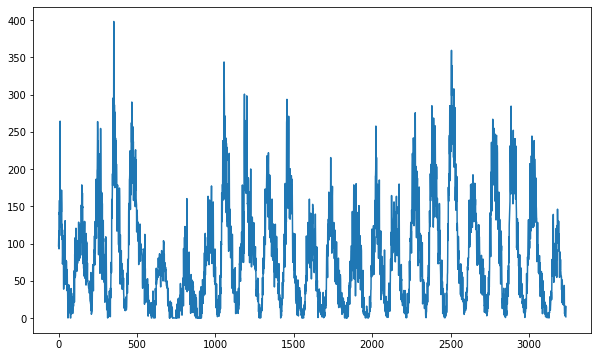

In [29]:
plt.figure(figsize=(10,6))
plt.plot(time_steps, sunspots)

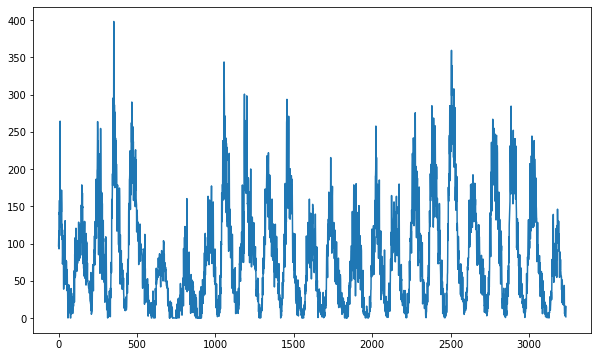

In [30]:
plt.figure(figsize=(10,6))
plt.plot(time,series)

In [9]:
split_time= 3000
time_train= time[:split_time]
x_train= series[:split_time]

time_valid=time[split_time:]
x_valid=series[split_time:]

window_size=60
batch_size=32
shuffle_buffer_size=1000

In [36]:
time_train.shape
x_train.shape

time_valid.shape
x_valid

array([ 86. ,  98. , 103.5,  93.6, 149.6, 207.2, 173.5, 142.3, 106.3,
       168.7, 188.3, 116.8, 133.1, 165.7, 217.7, 191.5, 165.9, 188. ,
       244.3, 180.5, 156. , 141.6, 158.1, 143.3, 142.6, 121.5, 165.8,
       161.7, 142.1, 202.9, 123. , 161.5, 238.2, 194.1, 176.6, 213.4,
       184.6, 170.2, 147.1, 186.9, 187.5, 128.8, 161. , 175.6, 187.9,
       151.2, 147.2, 135.3, 133.5,  75.7, 100.7,  97.9,  86.8, 118.7,
       128.3, 115.4,  78.5,  97.8,  82.9,  72.2,  60.6,  74.6,  74.8,
        59.2,  72.8,  66.5,  83.8,  69.7,  48.8,  74.2,  70.1,  28.9,
        48.1,  43.5,  39.6,  38.7,  61.9,  56.8,  62.4,  60.5,  37.2,
        13.2,  27.5,  59.3,  20.9,   5.7,  17.3,  50.3,  37.2,  24.5,
        22.2,  20.8,  23.7,  14.9,  35.7,  22.3,  29.3,  18.4,   7.2,
         5.4,  19.5,  21.3,  15.1,   9.8,   4. ,   1.5,   2.8,  17.3,
         4.1,   2.9,  15.5,   3.6,   4.6,   5.2,   0.6,   0.3,   1.2,
         4.2,   6.6,   1. ,   1.3,   1.2,   0.6,   1.2,   2.9,   6.3,
         5.5,   0. ,

the following line of code is not needed as we are not working with LSTM layers
"series = tf.expand_dims(series,axis=-1) "

we do not need the forecast function neither 

In [37]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [38]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [39]:
dataset


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
#finding the learning rate

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=[window_size], activation= 'relu'),
  tf.keras.layers.Dense(10, activation= 'relu'),
  tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])

history = model.fit(dataset, epochs = 100, callbacks=[lr_schedule])

(1e-08, 0.0001, 0.0, 12000.0)

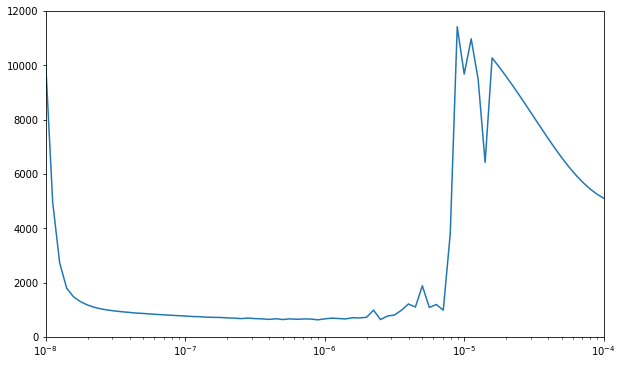

In [13]:
plt.figure(figsize=(10,6))
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8, 1e-4,0,12000])

In [ ]:
#training model

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=[window_size], activation= 'relu'),
  tf.keras.layers.Dense(10, activation= 'relu'),
  tf.keras.layers.Dense(1),
  #tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)

model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])

history = model.fit(dataset, epochs = 100)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                1220      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [63]:
forecast=[]
for time_step in range(len(series) - window_size):
  forecast.append(model.predict(series[time_step:time_step+window_size][np.newaxis]))

In [66]:
forecast = forecast[split_time - window_size : ]

In [69]:
results = np.array(forecast)[:,0,0]

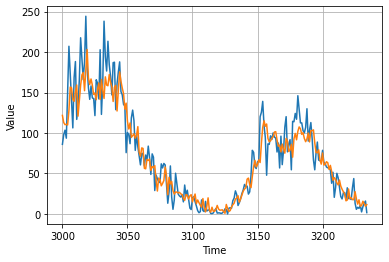

In [73]:
plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.show()

In [76]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

14.90467